In [23]:
include("includeall.jl")
include("visualize_all.jl") #asserts matrix is symmetric + runs all methods + visualize them

visualize_all (generic function with 1 method)

# Pick the dataset you want to regenerate, or create your own
### Get the data, put it in adjacency matrix A
### if you have labels, store them in numberic values between 1 and groups_nb
### if you want to display edges in the graph, set `displayedges = true`

## Run as follows:
```
visualize_all(yourfilename_prefix,A,displayedges;labels=labels); ## when you have labels, or

visualize_all(yourfilename_prefix,A,displayedges)
```

length(unique(labels)) = 6
mydims = [5, 10]
size(X) = (128, 3)
size(X) = (128, 3)
size(X) = (128, 10)
size(X) = (128, 10)


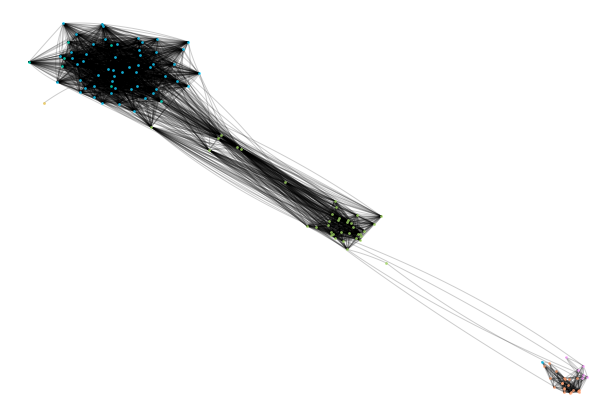

mexican_senate


In [14]:
# mexican senate
using DelimitedFiles
using SimpleWeightedGraphs
using LightGraphs
using Node2Vec
tred = readdlm("../data/adyacencias.csv",'|')
Nodes = readdlm("../data/los_nombres.csv",',')
sen = readdlm("../data/senators.csv",'|')
partidos = readdlm("../data/los_partidos.csv",'|')
;
dic_nodes = Dict{String,Int64}(Dict(Nodes[i]=>i for i in eachindex(Nodes)))
g = SimpleWeightedGraph()
G = Graph()
last_node = lastindex(Nodes)
add_vertices!(g, last_node)
add_vertices!(G, last_node)
for n in 1:Int64(size(tred)[1])
    add_edge!(g,dic_nodes[tred[n,1]],
              dic_nodes[tred[n,2]],
              tred[n,3])
    add_edge!(G,dic_nodes[tred[n,1]],
              dic_nodes[tred[n,2]])
end
;
A = sparse(g)
ord_party = zeros(Int,length(partidos))
ord_party[findall(partidos.=="PRI")] .= 1
ord_party[findall(partidos.=="PAN")] .= 2
ord_party[findall(partidos.=="PRD")] .= 3
ord_party[findall(partidos.=="PVEM")] .= 4
ord_party[findall(partidos.=="PT")] .= 5
ord_party[findall(partidos.=="Independiente")] .= 6
labels = ord_party
@show length(unique(labels))
;

# visualize_all("mexican_senate_temp",A,true;labels=labels);
visualize_all("mexican_senate_temp",A,true;labels=labels,
        TSfunction=x->x,fromk=3,tok=10,trialnb=500000,mydims = [5,10])
println("mexican_senate")

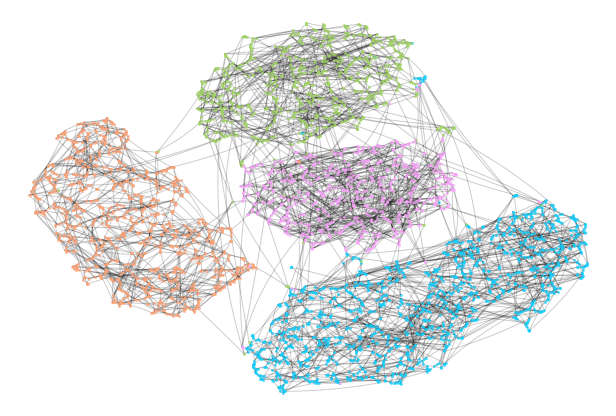

names(T) = ["A", "digits1234_3labels", "xy3", "labels", "digits1234_3smat", "digits1234xy_3"]
size(X) = (4575, 3)
size(X) = (4575, 3)
size(X) = (4575, 5)
size(X) = (4575, 10)
size(X) = (4575, 25)
size(X) = (4575, 50)
size(X) = (4575, 5)
size(X) = (4575, 10)
size(X) = (4575, 25)
size(X) = (4575, 50)
digits


┌ Warning: largest clique size found is 4
└ @ Main /u/subspace_s4/hnassar/TuranShadow/TuranShadow-6-6/includeall.jl:187
┌ Warning: largest clique size found is 4
└ @ Main /u/subspace_s4/hnassar/TuranShadow/TuranShadow-6-6/includeall.jl:215
┌ Warning: the null-space vector associated with the normalized Laplacian
│ was computed inaccurately (diff=1.414e+00); the Fiedler vector is
│ probably wrong or the graph is disconnected
└ @ Main /u/subspace_s4/hnassar/TuranShadow/TuranShadow-6-6/TuranShadow.jl:237


In [68]:
# digits dataset
# get the graph A and its labels if they exist
using MAT
T = MAT.matopen("../data/digits.mat")
@show names(T)
A = read(T,"A")
labels = read(T,"labels")
@assert issymmetric(A)
visualize_all("digits",A,true;labels=labels)
println("digits")

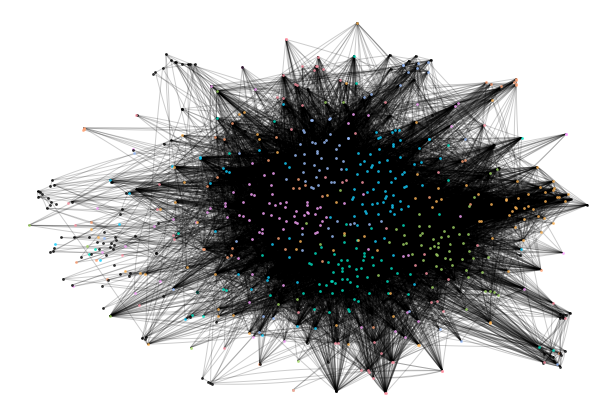

size(X) = (762, 3)
size(X) = (762, 3)
size(X) = (762, 5)
size(X) = (762, 10)
size(X) = (762, 25)
size(X) = (762, 50)
size(X) = (762, 5)
size(X) = (762, 10)
size(X) = (762, 25)
size(X) = (762, 50)
Caltech36


┌ Warning: largest clique size found is 20
└ @ Main /u/subspace_s4/hnassar/TuranShadow/TuranShadow-6-6/includeall.jl:187
┌ Warning: largest clique size found is 20
└ @ Main /u/subspace_s4/hnassar/TuranShadow/TuranShadow-6-6/includeall.jl:215


In [69]:
# get the graph A and its labels if they exist
# one of the facebook datsets
using MAT
T = MAT.matopen("../data/Caltech36.mat")

attributes = read(T,"local_info")
A = read(T,"A")
A,lccv = largest_component(A);
attributes = attributes[lccv,:];
labels = attributes[:,5]

visualize_all("Caltech36",A,true;labels=labels)
println("Caltech36")

mydims = [5, 10, 25, 50]
size(X) = (379500, 50)


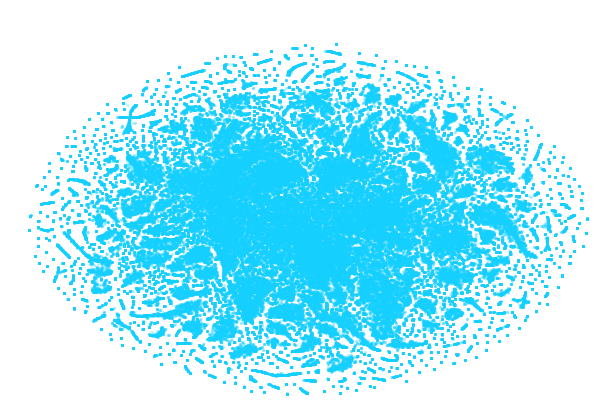

size(X) = (379500, 50)


In [24]:
A = Int.(MatrixNetworks.readSMAT("/p/mnt/data/traces/anony-interactions-onemonthA-cc.smat"))
alltimes = visualize_all("FB_from_David_new_",A,false;fromk=3,tok=10,trialnb=500000);